<a href="https://colab.research.google.com/github/AlanItzep/DL/blob/master/overfitting_unverfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from __future__ import absolute_import, division, print_function,unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
NUM_WORDS = 10000
(train_data, train_labels),(test_data,test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences,dimension):
  results = np.zeros((len(sequences),dimension))
  for i, word_indices in enumerate(sequences):
    results[i,word_indices]=1.0
  return results

train_data = multi_hot_sequences(train_data,dimension=NUM_WORDS)
test_data=multi_hot_sequences(test_data,dimension=NUM_WORDS)


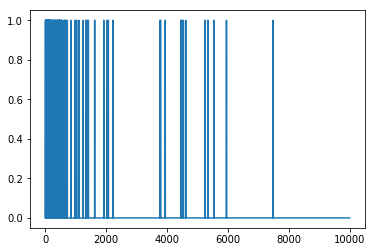

In [40]:
plt.plot(train_data[0])

In [41]:
baseline_model=keras.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_29 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [42]:
baseline_history=baseline_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data,test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4586 - acc: 0.8128 - binary_crossentropy: 0.4586 - val_loss: 0.3116 - val_acc: 0.8798 - val_binary_crossentropy: 0.3116
Epoch 2/20
25000/25000 - 3s - loss: 0.2305 - acc: 0.9160 - binary_crossentropy: 0.2305 - val_loss: 0.2830 - val_acc: 0.8864 - val_binary_crossentropy: 0.2830
Epoch 3/20
25000/25000 - 3s - loss: 0.1682 - acc: 0.9413 - binary_crossentropy: 0.1682 - val_loss: 0.3010 - val_acc: 0.8800 - val_binary_crossentropy: 0.3010
Epoch 4/20
25000/25000 - 3s - loss: 0.1356 - acc: 0.9538 - binary_crossentropy: 0.1356 - val_loss: 0.3519 - val_acc: 0.8676 - val_binary_crossentropy: 0.3519
Epoch 5/20
25000/25000 - 3s - loss: 0.1097 - acc: 0.9641 - binary_crossentropy: 0.1097 - val_loss: 0.3567 - val_acc: 0.8714 - val_binary_crossentropy: 0.3567
Epoch 6/20
25000/25000 - 3s - loss: 0.0881 - acc: 0.9731 - binary_crossentropy: 0.0881 - val_loss: 0.3918 - val_acc: 0.8680 - val_binary_crossentropy: 0.3918
Ep

In [43]:
smaller_model=keras.Sequential([
    keras.layers.Dense(4,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [44]:
smaller_history=smaller_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data,test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5563 - acc: 0.7718 - binary_crossentropy: 0.5563 - val_loss: 0.4315 - val_acc: 0.8538 - val_binary_crossentropy: 0.4315
Epoch 2/20
25000/25000 - 3s - loss: 0.3291 - acc: 0.8975 - binary_crossentropy: 0.3291 - val_loss: 0.3172 - val_acc: 0.8838 - val_binary_crossentropy: 0.3172
Epoch 3/20
25000/25000 - 3s - loss: 0.2377 - acc: 0.9228 - binary_crossentropy: 0.2377 - val_loss: 0.2896 - val_acc: 0.8872 - val_binary_crossentropy: 0.2896
Epoch 4/20
25000/25000 - 3s - loss: 0.1935 - acc: 0.9366 - binary_crossentropy: 0.1935 - val_loss: 0.2839 - val_acc: 0.8859 - val_binary_crossentropy: 0.2839
Epoch 5/20
25000/25000 - 3s - loss: 0.1660 - acc: 0.9455 - binary_crossentropy: 0.1660 - val_loss: 0.2916 - val_acc: 0.8840 - val_binary_crossentropy: 0.2916
Epoch 6/20
25000/25000 - 3s - loss: 0.1451 - acc: 0.9532 - binary_crossentropy: 0.1451 - val_loss: 0.3011 - val_acc: 0.8808 - val_binary_crossentropy: 0.3011
Ep

In [45]:
bigger_model=keras.models.Sequential([
    keras.layers.Dense(512,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])
bigger_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [46]:
bigger_history = bigger_model.fit(train_data,train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data,test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 17s - loss: 0.3395 - acc: 0.8561 - binary_crossentropy: 0.3395 - val_loss: 0.2949 - val_acc: 0.8796 - val_binary_crossentropy: 0.2949
Epoch 2/20
25000/25000 - 16s - loss: 0.1429 - acc: 0.9476 - binary_crossentropy: 0.1429 - val_loss: 0.3344 - val_acc: 0.8731 - val_binary_crossentropy: 0.3344
Epoch 3/20
25000/25000 - 16s - loss: 0.0472 - acc: 0.9865 - binary_crossentropy: 0.0472 - val_loss: 0.4733 - val_acc: 0.8665 - val_binary_crossentropy: 0.4733
Epoch 4/20
25000/25000 - 16s - loss: 0.0077 - acc: 0.9986 - binary_crossentropy: 0.0077 - val_loss: 0.6025 - val_acc: 0.8684 - val_binary_crossentropy: 0.6025
Epoch 5/20
25000/25000 - 17s - loss: 9.5285e-04 - acc: 1.0000 - binary_crossentropy: 9.5285e-04 - val_loss: 0.7021 - val_acc: 0.8696 - val_binary_crossentropy: 0.7021
Epoch 6/20
25000/25000 - 17s - loss: 2.2912e-04 - acc: 1.0000 - binary_crossentropy: 2.2912e-04 - val_loss: 0.7514 - val_acc: 0.8698 - val_binary_c

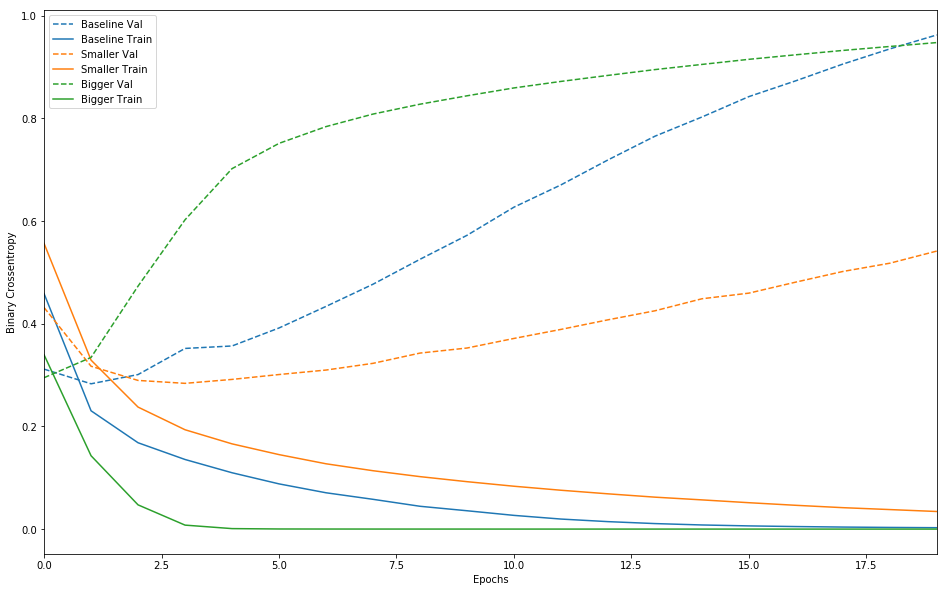

In [56]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  
  for name, history in histories:
    val=plt.plot(history.epoch,history.history['val_'+key],
                 '--',label=name.title()+' Val')
    plt.plot(history.epoch,history.history[key],color=val[0].get_color(),
            label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
    

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


In [0]:
l2_model=keras.models.Sequentila([
    keras.layers.Dense(16,)
])